# 强化学习笔记：策略(policies)与值函数(value functions)

# 1. 前言

本篇介绍策略、两种值函数（状态值函数和动作值函数），以及大名鼎鼎的贝尔曼方程。补充了一点关于贝尔曼方程的推导过程，希望能够帮助理解。

本文中公式编号(*,*)中第2部分表示对应公式（如果在原书中有的话）在原书中的编号。


# 2. 策略和值函数的定义

几乎所有的强化学习算法都涉及到值函数（作为状态的函数，或者“状态-动作对”的函数）的估计，用于衡量对应状态或者“状态-动作对”对于智能体的价值（how good it is），这个价值体现了智能体在该状态下，或者说“状态-动作对”的条件下所能期望的回报，而这个又依赖于在未来智能体将采取什么动作序列，也即依赖于智能体以什么样的方式选择动作，即（动作选择）策略(policies)。

策略(policy)是指从状态到选择各种动作的概率的映射，通常用字符$\pi$表示：$\pi(a|s)=Pr(A_t=a|S_t=s),\;a\in\mathcal{A}(s),s\in\mathcal{S}$.与前文的p相同，$\pi$本身也是一个普通的函数（与p同样，它表示是一种条件概率）。

强化学习的目标就是学习（更好的）策略，即（基于经验、值函数估计值等）学会如何（根据当前的状态）采取行动，以达成总体或长期回报的最大化。
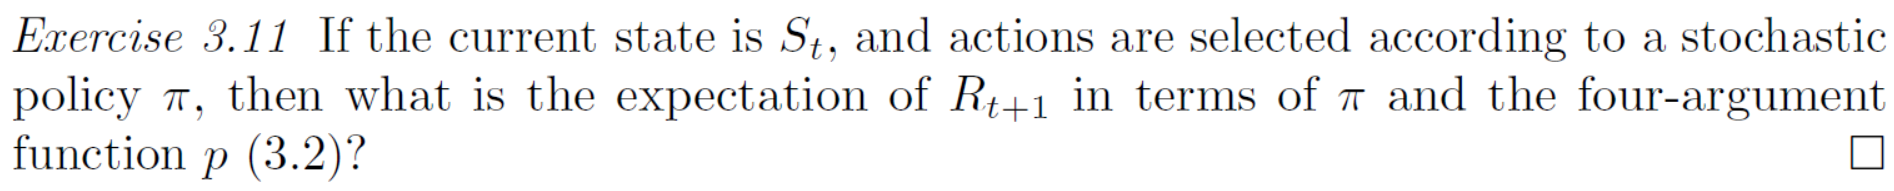

Solution: 

式(3.2)(sutton-book原书编号)如下所示：
$$p(s', r|s, a) \doteq Pr(S_t=s',R_t=r | S_{t−1}=s,A_{t−1}=a), \forall s,s'\in \mathcal{S}, r\in\mathcal{R}, and\  a\in\mathcal{A}(s) \quad\cdots(1,3.2)$$

$R_{t+1}$可以如下计算而得：
$$\mathbb{E}_{\pi}[R_{t+1}] = \sum\limits_{r\in\mathcal{R}}r\sum\limits_{s'\in\mathcal{S}}p(s', r|s, a),\quad \forall s\in\mathcal{S}, a\in\mathcal{A}(s)$$

在策略$\pi$的条件下的状态s的值函数记为$v_{\pi}(s)$，表示从状态s出发遵循策略$\pi$所能得到的期望回报，在马尔科夫决策过程中，可以定义如下：

$$v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t|S_t=s] = \mathbb{E}_{\pi}\bigg[\sum\limits_{k=0}\limits^{\infty}\gamma^k R_{t+k+1}\bigg|S_t=s\bigg], \forall s\in\mathcal{S} \quad\cdots(2,3.12)$$

注意，这里$v_{\pi}(s)$与t无关，只与状态s有关，并且通常称为状态值函数(state-value function)，以区别于接下来定义的动作值函数。

（依赖于"状态-动作"的值函数，后者则称为状态动作值函数(state-action-value function)。）

同样，我们可以定义遵循策略$\pi$在状态s下采取动作a的条件下的值函数如下：

$$q_\pi(s,a) \doteq \mathbb{E}_{\pi}[G_t|S_t=s,A_t=a] = \mathbb{E}_{\pi}\bigg[\sum\limits_{k=0}\limits^{\infty}\gamma^k R_{t+k+1}\bigg|S_t=s,A_t=a\bigg], \forall s\in\mathcal{S},a\in\mathcal{A}(s) \quad\cdots(3,3.13)$$

通常$q_\pi(s,a)$被称为动作值函数(action-value function)。注意，虽然更严格一些的话似乎应该称为状态-动作-值函数，但是由于动作总是依赖于状态的，所以这里省略掉状态也并不会引起歧义。

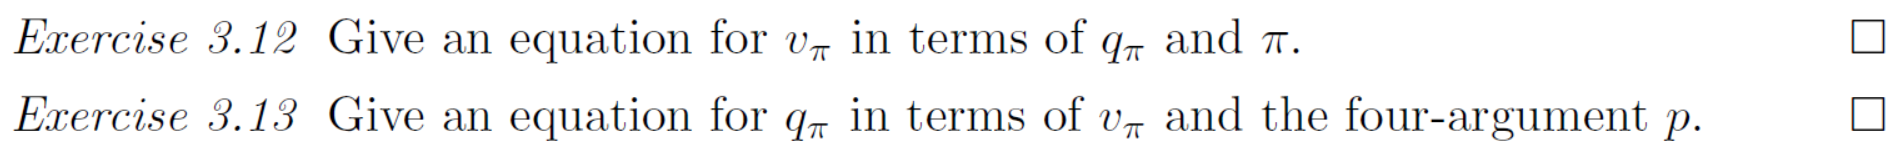

Solution-3.12: 
    
根据定义，$v_\pi(s)$是在状态s下采取所有各种可能的动作所得到的预期回报，而$q_\pi(s,a)$是在状态s下采取特定动作a时所得到的预期回报，因此$v_\pi(s)$可以看作是$q_\pi(s,a)$的关于动作a的期望，由此可得：

$$v_\pi(s) = \sum\limits_{a\in\mathcal{A}(s)}\pi(a|s)\cdot q_\pi(s,a)\quad\cdots(4)$$

# 3. 值函数的估计

值函数v和q可以以基于经验的方式进行估计。比如说，一个遵循策略$\pi$的智能体针对状态s进行跟踪统计，对每次碰到状态s后的实际回报进行平均就可以得到$v_\pi(s)$的近似估计，当碰到状态s的次数趋近无限时估计值就收敛于$v_\pi(s)$。同理，对每次状态s条件下采取动作a后所获得的实际回报进行跟踪、统计及平均即可得到$q_\pi(s,a)$的近似估计。这种估计方法就是所谓的蒙特卡洛方法。值函数估计的蒙特卡洛方法将在第5章讨论。

当状态数很多时，通常对每个状态分别跟踪统计会变得不现实，更太不上动作值函数的跟踪统计。取而代之的做法是将$v_\pi,q_\pi$近似地表示为参数化（参数个数远小于状态个数）的近似函数(function approximator)，然后条件参数使其更好地匹配实际观测到的回报。这种方法能够得到很精确的估计，当然估计性能依赖于所取的参数化函数近似器的性质。这一类方法将在本书第2部分讨论。


# 4. 状态值函数的贝尔曼方程

在前面我们得到了预期回报的递推关系(recursive relationships)，如下所示：

$$G_t = R_{t+1}+ \gamma G_{t+1} \qquad\cdots(5,3.9)$$

而值函数又是关于预期回报的条件均值，因此基于这个递推关系我们可以得到价值函数的递推关系，如下所示：

$$\begin{align}v_\pi(s) &\doteq \mathbb{E}_\pi[G_t|S_t=s] \\&= \mathbb{E}_\pi[R_{t+1}+ \gamma G_{t+1}|S_t=s] \\&= \sum\limits_{a}\pi(a|s)\sum\limits_{s'}\sum\limits_{r}p(s',r|s,a)\big[r+\gamma\mathbb{E}_\pi[G_{t+1}|S_{t+1}=s'] \big] 
\\&= \sum\limits_{a\in \mathcal{A}}\pi(a|s)\sum\limits_{s'\in \mathcal{S},r\in \mathcal{R}}p(s',r|s,a)\big[r+\gamma v_\pi(s') \big] \ \forall s\in\mathcal{S}
\quad\cdots(6,3.14) \end{align}$$


最后一行将针对s'和r的双重累加符号缩减为一个累加符号了，仅是为了是公式简洁一些，没有特别附加的含义。这最后一行也清楚表明了状态值函数$v_\pi(s)$是针对三元组{s',a,r}的所有可能组合的概率加权平均（expectation），结合下图可能更容易理解（更详细的解释可以参考原书，这种图叫做backuk diagram，备份图--感觉这个名字真是有点不知所云^-^）。



这个就是大名鼎鼎的状态值函数的贝尔曼方程。但是这个推导看起来有点可怕，尤其这个并不是概率论教材中中的公式应用一下能够直接得出的，需要结合其中各变量的物理含义才能推导得出。我想像我这样需要琢磨很久才能回过神来的菜鸟应该不在少数。让我们来看看能不能拆解得更加友好易懂一些。如下所示：

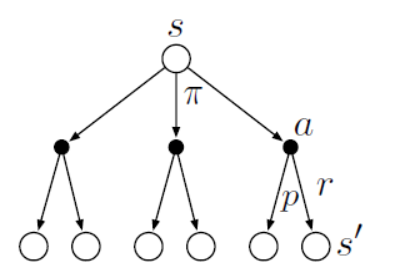 $$v_\pi(s)计算的backup \ diagram(备份图)$$

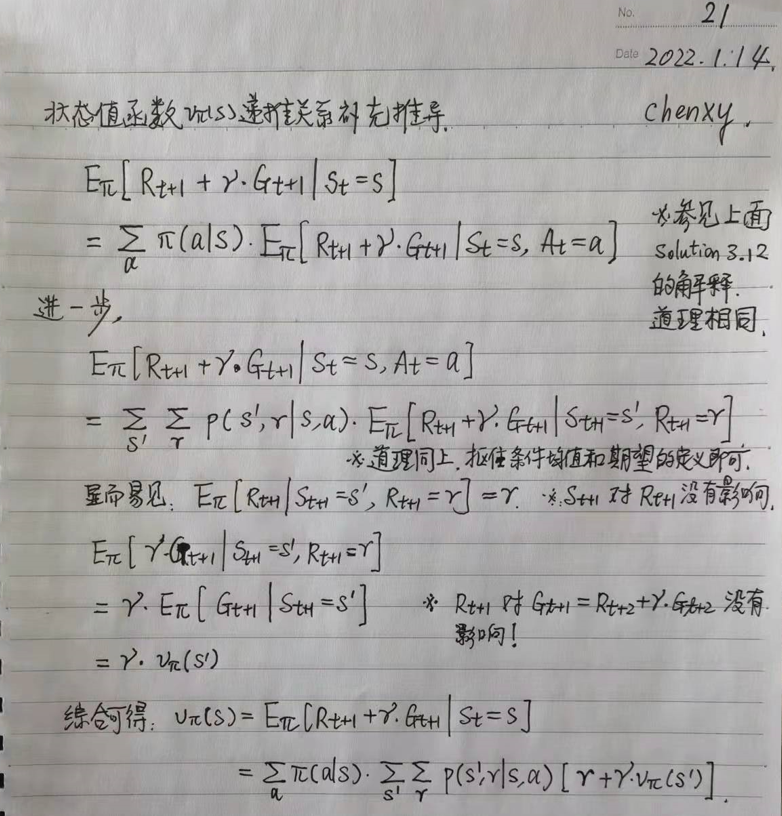

状态值函数$v_\pi(s)$是贝尔曼方程的唯一解。后续章节我们将看到贝尔曼方程是各种计算、近似和学习状态值函数的基础。

参考文献：

[1] Sutton-RLbook-chapter3.5
